In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import KMeans
from sklearn import metrics
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import pandas as pd
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.preprocessing import StandardScaler


# data visualization 
# from matplotlib import cm
# import seaborn as sns
# import plotly.plotly as py
# from sklearn.model_selection import learning_curve

In [3]:
import acquire
import prepare

df = acquire.get_mall_customer_data()
df = prepare.data_prep(df, cols_to_remove=[], prop_required_column = .6, prop_required_row=.75)

In [4]:
def encode_col(df, col):
    encoder = LabelEncoder()
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])
    return encoder, df

encoder, df_features = encode_col(df, col='gender')
df_features.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(data=scaled_array, columns=df_features.columns)
df_scaled.head()

,customer_id,gender,age,annual_income,spending_score
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


   k         sse
0  1  103.515653
1  2   54.050979
2  3   43.454795
3  4   34.897970
4  5   29.540026
5  6   24.969481
6  7   20.392680
7  8   17.149333
8  9   14.878136


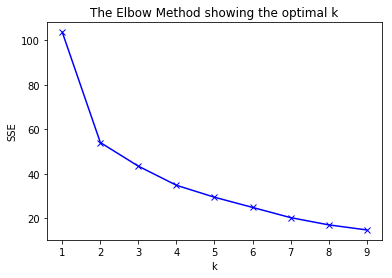

In [6]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('3 Clusters', KMeans(n_clusters=3))]

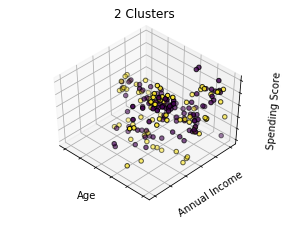

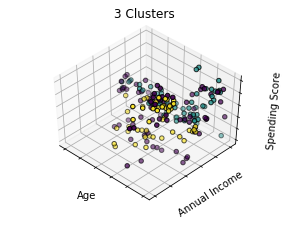

In [8]:
for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(df_scaled)

    fig = plt.figure(i + 1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(df_scaled.age, 
               df_scaled.annual_income, 
               df_scaled.spending_score,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    ax.set_title(title)
    ax.dist = 12